In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
df = sns.load_dataset('iris')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

VISUALIZATION

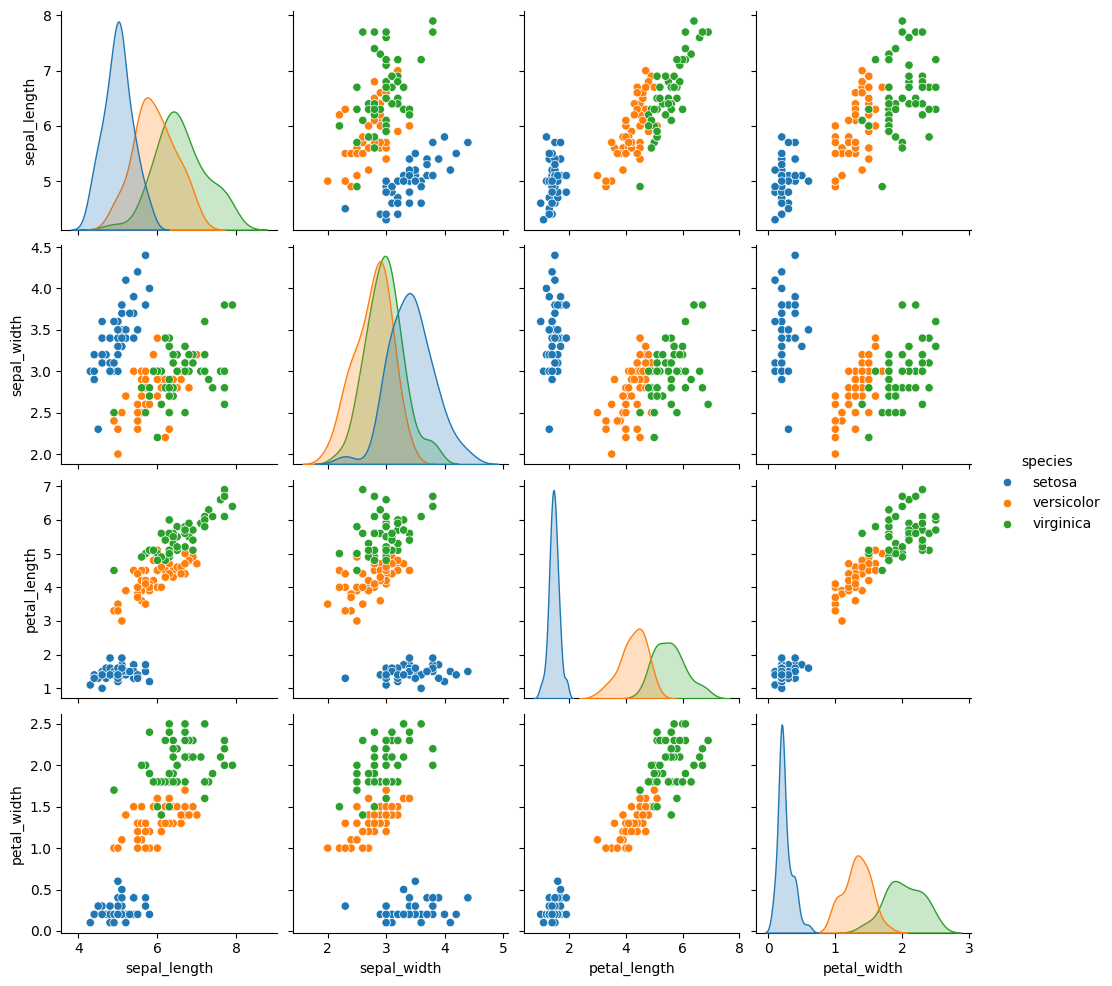

In [7]:
sns.pairplot(data = df, hue = 'species')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

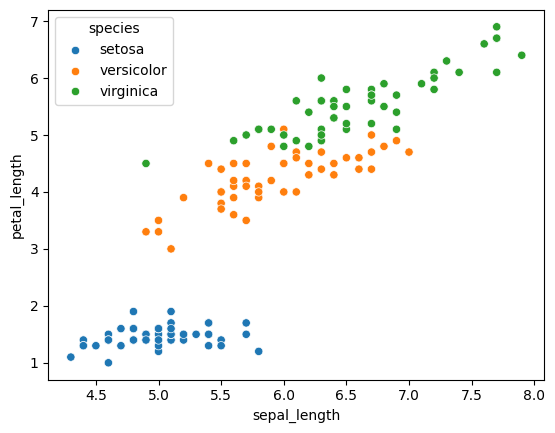

In [8]:
sns.scatterplot(x = 'sepal_length', y = 'petal_length', data = df, hue = 'species')

<Axes: xlabel='sepal_length'>

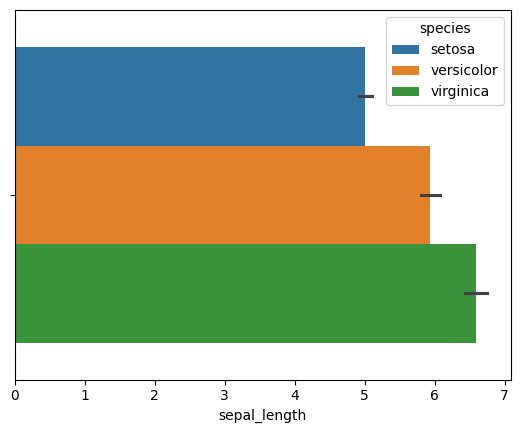

In [9]:
sns.barplot(x = 'sepal_length', data = df, hue = 'species')

<Axes: xlabel='petal_length'>

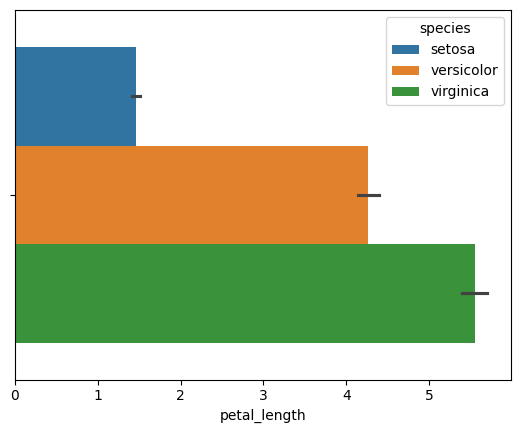

In [10]:
sns.barplot(x = 'petal_length', data = df, hue = 'species')

In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df['sepal_length'].sum()/150

np.float64(5.843333333333334)

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
x = df.iloc[:,:-1]
y = df.loc[:,'species']

In [15]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

Data Preprocessing

In [17]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [18]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
encoder = LabelEncoder()
y_trans = encoder.fit_transform(y)

Splitting into Training and Testing Subsets

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_trans, test_size =0.1, random_state = 0)

Training the model

In [21]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [22]:
training_accuracy = forest.score(x_train, y_train)

In [23]:
print(training_accuracy * 100)

100.0


In [24]:
training_accuracy

1.0

TESTING THE MODEL

In [25]:
pred = forest.predict(x_test)

In [26]:
pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1])

In [27]:
accuracy_score(y_test, pred)

1.0

In [28]:
model = joblib.dump(forest, 'IrisClassifier.pkl')

In [29]:
testing = joblib.load('IrisClassifier.pkl')

In [30]:
testing.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1])

In [31]:
sample = [[4.4, 3.1, 1.6, 0.3]]

In [32]:
testing.predict(sample)

array([2])

In [ ]:
def test():
    sample = [[4.2,3.1,1.6,0.3]]
    result = testing.predict(sample)